In [ ]:
import numpy as np
import numpy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from networkx.algorithms import bipartite
warnings.filterwarnings("ignore")
import random


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


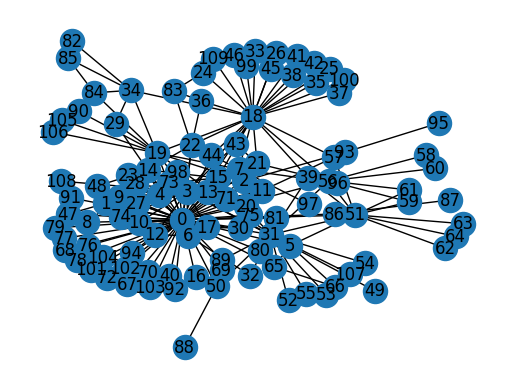

In [ ]:
G1=nx.read_weighted_edgelist('/content/drive/MyDrive/Data 2023/Caviar.txt')
A=nx.to_numpy_array(G1)#converts the graph G into a NumPy array A which represents the adjacency matrix of the graph
G1=nx.from_numpy_array(A) #converts the NumPy array A back into a NetworkX graph G
nx.draw_networkx(G1) #generates a network visualization of the graph G
plt.axis('off') #ensures no axis appear on the plot
#plt.savefig("small.png") #saves plot as a picture in png
plt.show()#gives output of the plot


In [ ]:
len(G1.nodes()), len(G1.edges())

(110, 205)

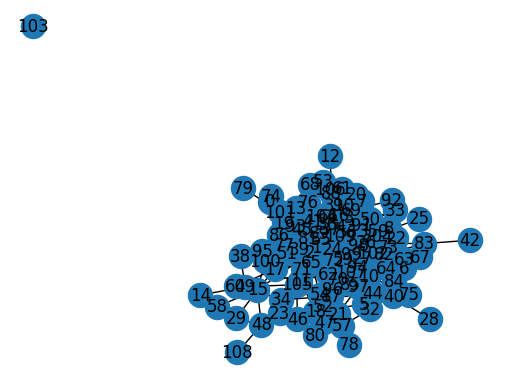

In [ ]:
n = len(G1.nodes())  # number of nodes
e = len(G1.edges())  # number of edges
seed = 427  # seed random number generators for reproducibility
#p=(e/(n/2)/(e-1))

# Use seed for reproducibility
G2=nx.erdos_renyi_graph(n,e*2/n/(n-1))
#G2 = nx.gnm_random_graph(n, m, seed,p)
B=nx.to_numpy_array(G2)#converts the graph G into a NumPy array A which represents the adjacency matrix of the graph
G2=nx.from_numpy_array(B) #converts the NumPy array A back into a NetworkX graph G
nx.draw_networkx(G2)
#nx.draw(G2, pos, with_labels=True, node_size=300)#generates a network visualization of the graph G2
plt.axis('off') #ensures no axis appear on the plot
plt.show()


In [ ]:
len(G2.nodes()),len(G2.edges())

(110, 218)

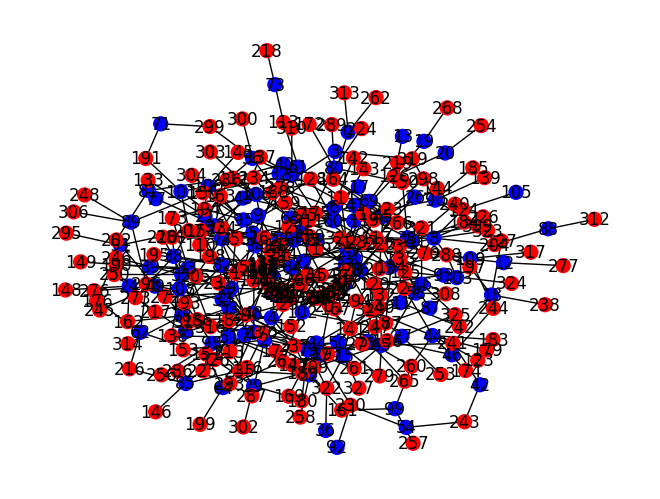

In [ ]:
G3 = nx.Graph()

# Define the number of human and mosquito nodes
n2 = n # Number of human nodes
n3 = n*2  # Number of mosquito nodes

# num_humans = len(G1.nodes()) # Number of human nodes
# num_mosquitoes = 50  # Number of mosquito nodes

# Generate node names with 'H' for humans and 'M' for mosquitoes
human_nodes = [f'H{i}' for i in range(1, n2 + 1)]
mosquito_nodes = [f'M{i}' for i in range(1, n3 + 1)]

G3.add_nodes_from(human_nodes, bipartite='human')
G3.add_nodes_from(mosquito_nodes, bipartite='mosquito')


# Add nodes to the graph
# G3.add_nodes_from([(node, {'bipartite': 'human'}) for node in human_nodes])
# G3.add_nodes_from([(node, {'bipartite': 'mosquito'}) for node in mosquito_nodes])

# Add edges to represent interactions
seed = 41
edges = [(random.choice(human_nodes), random.choice(mosquito_nodes)) for j in range(432)]
G3.add_edges_from(edges)

# Define node colors based on 'bipartite' attribute
node_colors = ['blue' if node[1]['bipartite'] == 'human' else 'red' for node in G3.nodes(data=True)]

C=nx.to_numpy_array(G3)#converts the graph G into a NumPy array A which represents the adjacency matrix of the graph
G3=nx.from_numpy_array(C) #converts the NumPy array A back into a NetworkX graph G


# visualizing the bipartite graph with different colors
pos = nx.kamada_kawai_layout(G3)
nx.draw(G3, pos, with_labels=True, node_color=node_colors, node_size=100)
plt.show()

In [ ]:
len(G3.nodes()),len(G3.edges())

(330, 430)

In [ ]:
bipartite.is_bipartite(G3)

True

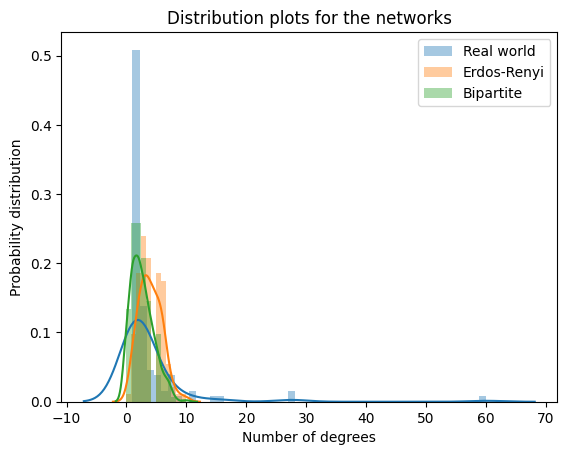

In [ ]:
degrees1 = [G1.degree(n) for n in G1.nodes()]
degrees2 = [G2.degree(n) for n in G2.nodes()]
degrees3 = [G3.degree(n) for n in G3.nodes()]
sns.distplot(degrees1,label='Real world')
sns.distplot(degrees2,label='Erdos-Renyi')
sns.distplot(degrees3,label='Bipartite')
plt.xlabel('Number of degrees')
plt.ylabel('Probability distribution')
plt.title('Distribution plots for the networks')
plt.legend()

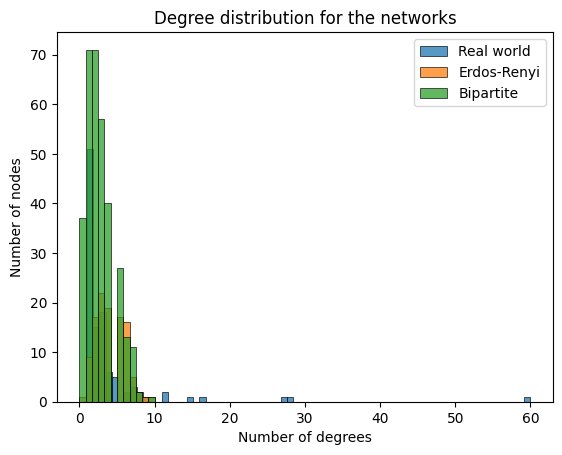

In [ ]:
#Degree plot for undirected and unweighted graph
degrees1 = [G1.degree(n) for n in G1.nodes()]
degrees2 = [G2.degree(n) for n in G2.nodes()]
degrees3 = [G3.degree(n) for n in G3.nodes()]
sns.histplot(degrees1,label='Real world')
sns.histplot(degrees2,label='Erdos-Renyi')
sns.histplot(degrees3,label='Bipartite')
plt.xlabel('Number of degrees')
plt.ylabel('Number of nodes')
plt.title('Degree distribution for the networks')
plt.legend()

In [ ]:
def epi_step(A, p, n, gamma, beta):
    """
    This function takes five parameters: A- Adjacency matrix of the network,p- A vector representing the state of the nodes
    in the network, n- The number of nodes in the network, gamma-  recovery rate, beta- infection rate. The function is meant to update
    the state of the epidemic for one time step on the given network.
    """
    q = np.zeros(n)
    for i in range(n):
        z = 1 #variable initialized to 1. It will be used to calculate the state of the current node.
        for j in range(n): #loops over whole network
            z = z * (1 - beta * A[i, j] * p[j]) #calculates the change in state for the current node based on the state of its neighbors
        q[i] = (1 - p[i]) * z + gamma * p[i] * z #calculates the new state of the current node i based on the change in state computed from
        #its neighbors. It uses both p (the current state) and z (the change in state) as part of the calculation
    p = 1 - q #updates the p variable to represent the new state of all nodes in the network
    return p #returns updated state of the nodes

In [ ]:
def trial(A, gamma, beta, m, init):
    """
    This function takes five parameters: A- Adjacency matrix of the network, gamma- recovery rate, beta- infection rate,m- number of time
    steps,init- initial state of nodes, which is generated randomly and then normalized to ensure that the sum of the initial states is 1.
    Function simulates an epidemic spread over a specified number of time steps, m.
    """
    t = np.zeros(m)
    n = len(A)
    p=init
    for i in range(m): #looping over m time steps
        t[i] = sum(p)#sums up the elements in the p vector (giving a cumulative array)
        p = epi_step(A, p, n, gamma, beta) #function then calls the previous epi-step function
    final_cumulative_state = sum(p)
    return t, p, final_cumulative_state #After running the loop for m time steps, the function returns three values



In [ ]:
def trial2(A, gamma, beta, m, init, n2):
    """
    An adaptation of Trial function, considering the bipartite network with varying nodes
    """
    t = np.zeros(m)
    n = len(A)
    p=init
    for i in range(m):
        t[i] = sum(p[0:n2-1])
        p = epi_step(A, p, n, gamma, beta)
    final_cumulative_state1 = sum(p[0:n2-1])
    return t, p, final_cumulative_state1

In [ ]:
m=100
gamma=.05
beta=.5
init = np.random.rand(len(A))
init =init/sum(init)
init1 = np.random.rand(len(C))
init1 =init1/sum(init1)

In [ ]:
t1, p1, final_cumulative_state1 = trial(A, gamma, beta, m, init)  # Real world network
t2, p2, final_cumulative_state2 = trial(B, gamma, beta, m, init)  # Random network
t3, p3, final_cumulative_state3 = trial2(C, gamma, beta, m, init1,n2)  # Bipartite network

In [ ]:
print("Final Cumulative State for Real world network:", final_cumulative_state1)
print("Final Cumulative State for Random network:", final_cumulative_state2)
print("Final Cumulative State for Bipartite network:", final_cumulative_state3)

Final Cumulative State for Real world network: 107.15950213422794
Final Cumulative State for Random network: 108.02337831635349
Final Cumulative State for Bipartite network: 105.08359600822143


Text(0.5, 1.0, 'Epidemic dynamics over time')

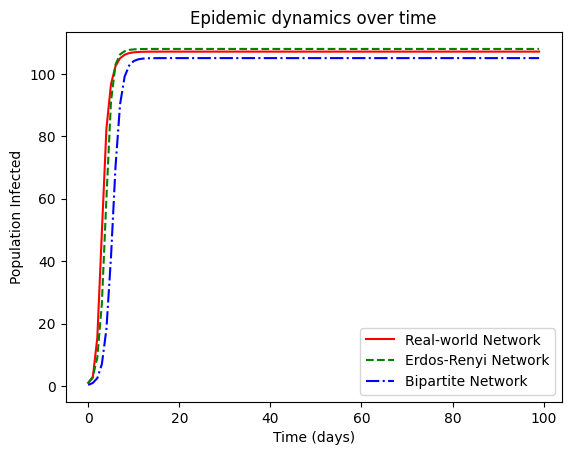

In [ ]:
plt.clf()

plt.plot(range(m),t1,label='Real-world Network', linestyle='-', color='red')#Real world network
plt.plot(range(m),t2,label='Erdos-Renyi Network', linestyle='--', color='green')#Random network
plt.plot(range(m),t3,label='Bipartite Network', linestyle='-.', color='blue')#Bipartite network
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Population Infected')
plt.title('Epidemic dynamics over time')